# Applying Lasso and Ridge Regression

A common problem in machine learning is that an algorithm might work really well on the
training set, but when applied to unseen data it makes a lot of mistakes. You can see how
this is problematic, since often we are most interested in how a model **generalizes** to new
data. Some algorithms (such as decision trees) are more susceptible to this phenomenon
than others, but even linear regression can be affected.

This phenomeon is also known as **overfitting**, and we will talk about it
extensively in [Chapter 5](05.00-Using-Decision-Trees-to-Make-a-Medical-Diagnosis.ipynb), *Using Decision Trees to Make a Medical Diagnosis*,
and [Chapter 11](11.00-Selecting-the-Right-Model-with-Hyper-Parameter-Tuning.ipynb), *Selecting the Right Model with Hyperparameter Tuning*.

A common technique for reducing overfitting is called **regularization**, which involves
adding an additional constraint to the cost function that is independent of all feature values.

The two most commonly used **regularizors** are as follows:
- **L1 regularization**: This adds a term to the scoring function that is proportional to the sum of all absolute weight values. In other words, it is based on the **L1 norm** of the weight vector (also known as the **rectilinear distance**, **snake distance**, or **Manhattan distance**). The resulting algorithm is also known as **Lasso regression**.
- **L2 regularization**: This adds a term to the scoring function that is proportional to the sum of all squared weight values. In other words, it is based on the **L2 norm** of the weight vector (also known as the **Euclidean distance**). Since the L2 norm involves a squaring operation, it punishes strong outliers in the weight vector much harder than the L1 norm. The resulting algorithm is also known as **ridge regression**.

The procedure is exactly the same as the preceding one, but we replace the initialization
command to load either a Lasso or a RidgeRegression object. Specifically, we have to
replace the following command:

    In [6]: linreg = linear_model.LinearRegression()

For the Lasso regression algorithm, we would change the preceding line of code to the
following:

    In [6]: lassoreg = linear_model.Lasso()

For the ridge regression algorithm, we would change the preceding line of code to the
following:

    In [6]: ridgereg = linear_model.RidgeRegression()
    
I encourage you to test these two algorithms on the Boston dataset in place of conventional
linear regression. You can use the code below.

How does the generalization error (`In [12]`) change? How does the
prediction plot (`In [14]`) change? Do you see any improvements in performance?

### Loading the dataset

In [4]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

The Boston dataset is included in Scikit-Learn's example datasets

In [7]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
features = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

Inspect the `boston` object:
- `DESCR`: Get a description of the data
- `data`: The actual data, <`num_samples` x `num_features`>
- `feature_names`: The names of the features
- `target`: The class labels, <`num_samples` x 1>
- `target_names`: The names of the class labels

### Training the model

This is the line you want to replace with either `Lasso` or `Ridge`.

In [28]:
ridgereg = linear_model.Ridge()

In [30]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, target, test_size=0.1, random_state=42
)

In [32]:
ridgereg.fit(X_train, y_train)

Ridge()

In [34]:
metrics.mean_squared_error(y_train, ridgereg.predict(X_train))

22.92375435052095

In [36]:
ridgereg.score(X_train, y_train)

0.7353661779527543

### Testing the model

In [39]:
y_pred = ridgereg.predict(X_test)

In [41]:
metrics.mean_squared_error(y_test, y_pred)

14.775452511215354

Text(0, 0.5, 'target value')

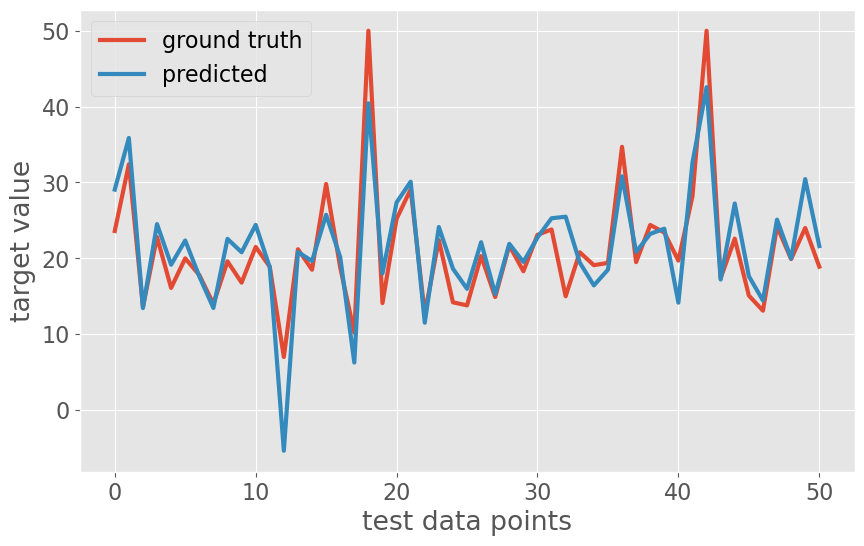

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

Text(-5, 45, 'MSE = 14.775')

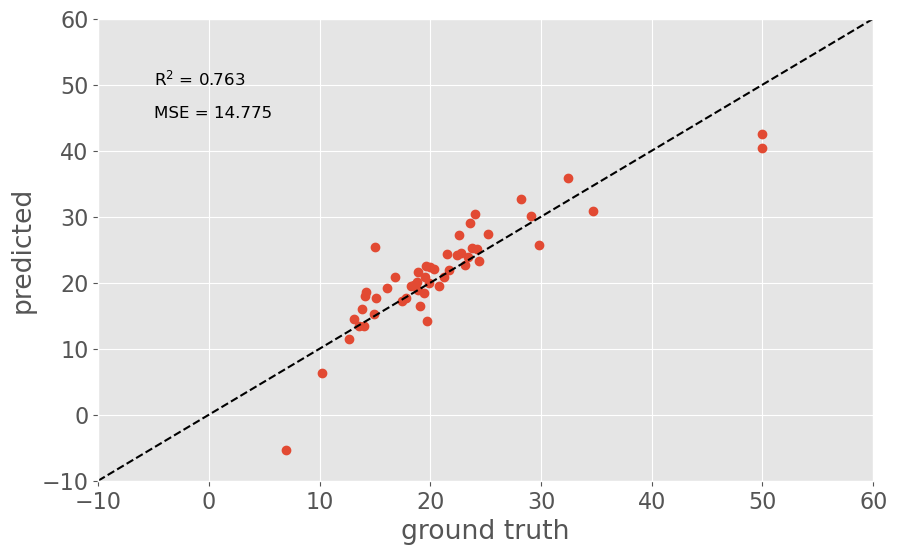

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % ridgereg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12)

<!--NAVIGATION-->
< [Using Regression Models to Predict Continuous Outcomes](03.03-Using-Regression-Models-to-Predict-Continuous-Outcomes.ipynb) | [Contents](../README.md) | [Classifying Iris Species Using Logistic Regression](03.05-Classifying-Iris-Species-Using-Logistic-Regression.ipynb) >